In [54]:
# All libraries required
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [55]:
# Load in the data
files = ['opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv']

all_data = pd.DataFrame()
for file in files:
    # Read in each file
    car_data = pd.read_csv("./resources/"+file, sep=";")

    # Remove unrelated columns
    car_data = car_data.drop(columns=['Unnamed: 0'])

    # Concatenate the data together
    all_data = pd.concat([all_data, car_data], ignore_index=True, sort=False)

all_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.810000,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.650000,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.850000,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.210000,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.910000,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,1755.5,20.469999,25.0,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23771,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,736.5,17.740000,25.0,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23772,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,1254.0,9.520000,24.0,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23773,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,1254.0,14.910000,23.0,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [56]:
# Determine X (input) and y (output) - y in this case, will be drivingStyle

# Drop any values that have NaN
all_data = all_data.dropna()

x_data = all_data.copy().drop(columns=['roadSurface', 'traffic', 'drivingStyle'])
y_data = all_data[['drivingStyle']]
print(x_data.head())
print(y_data.head())

   AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -2.299988                  25.670519            13.223501   
1          -2.099976                  24.094259            13.638919   
2          -1.500000                  22.743179            14.031043   
3           0.100037                  22.292820            14.171073   
4           0.099976                  23.643900            14.328954   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            121.592690              -2.476980                    0.3555   
1            120.422571              -1.576260                    0.4492   
2            118.456769              -1.351080                    0.4258   
3            117.571308              -0.450359                    0.4140   
4            117.074149               1.351080                    0.3945   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    4.705883                 

In [57]:
# Pre-processing

# Normalise values
x_data = x_data.to_numpy()
x_data = preprocessing.normalize(x_data)

# Label Encoder
le_driving_style = preprocessing.LabelEncoder()
le_driving_style.fit(y_data)
y_data = le_driving_style.transform(y_data)
y_data

c:\Users\chaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\chaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 1, 1, ..., 1, 1, 1])

In [58]:
# Split into different data sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)
X_train

array([[ 0.        ,  0.        ,  0.01910496, ...,  0.04374704,
        -0.00059096,  0.01793405],
       [ 0.00060698,  0.02488618,  0.02497723, ...,  0.01281402,
        -0.00025824,  0.009402  ],
       [-0.00023272,  0.00550366,  0.01531852, ...,  0.01862183,
         0.00010917,  0.02068009],
       ...,
       [ 0.        ,  0.        ,  0.00477493, ...,  0.01468035,
        -0.00011463,  0.02534627],
       [-0.00140301,  0.0157839 ,  0.01266658, ...,  0.03156779,
         0.00015249,  0.0086616 ],
       [ 0.0019444 ,  0.02406202,  0.01047549, ...,  0.01215254,
        -0.000108  ,  0.01716169]])

----
# Algorithm 1: Logistic Regression

In [59]:
# Libraries
from sklearn.linear_model import LogisticRegression

In [60]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [61]:
model_logistic.score(X_test, y_test)

0.8838579363743477

In [62]:
y_logis_pred = model_logistic.predict(X_test)
y_logis_pred

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
y_logis_predprob = model_logistic.predict_proba(X_test)
y_logis_predprob

array([[0.15420387, 0.84579613],
       [0.12120117, 0.87879883],
       [0.08705951, 0.91294049],
       ...,
       [0.16455695, 0.83544305],
       [0.24912768, 0.75087232],
       [0.10447272, 0.89552728]])

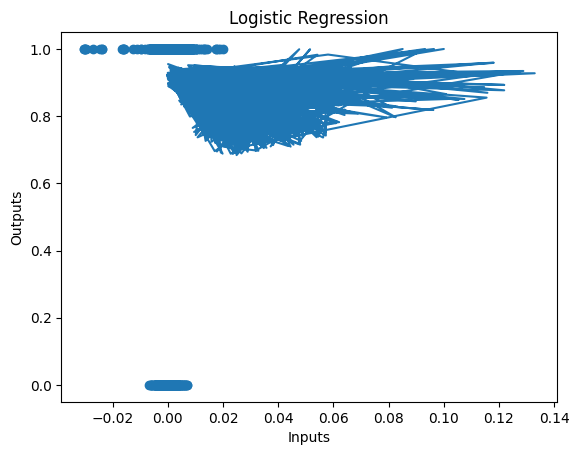

In [78]:
plt.scatter(x_data[:,0], y_data)
axes = plt.gca()
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Logistic Regression')

plt.plot(X_test[:,2], y_logis_predprob[:,1])

Output predicted is mostly 1s due to input.